# Urbana Weather

---
author: Alex Kim
date: September 18, 2024
embed-resources: true
---

## Introduction

Lincoln Square, an establishment in downtown Urbana in 1964, is where both the Common Ground Food Co-Operative and the Market at the square is located at. The market heavily relies on the weather in Urbana on its decision to be held outdoors or indoors. When the weather is decently warm, the market is held outdoors. However, when the weather get cold, the market is usually held indoors at the Licoln Square. In this lab, we will be developing a model that will predict and forecast the minimum daily temperature in Urbana, Illinois. This is done so specfically to determine when the outdoor Urbana Farmers market at Lincoln Square should move indoors due to cold weather. The minimum temperature plays an important role here in that it can predict the weather when the market opens up early in the morning. As the manager of the Market at the Square, providing accurate predictions on the weather in advance to vendors can make informed decisions on when to move the markets indoors or stay outdoors with early notice.

## Methods

To develop the predictive weather model in Urbana, we will be using historical weather data in Urbana collected using the Historical Weather API from Open-Meteo API. The weather dataset being used in this lab is a combination of various weather sources, such as weather station, aircraft, buoy, radar, and satelite, to provide a more comprehensive historical weather data. The weather dataset is specific to Urbana, Illinois and was accessed using coordinates set at latitude 40.1106 and longitude -88.2073, where Lincoln Square is located at. The weather dataset is splitted in four datasets, which are weather-train.csv (train data), weather-vtrain.csv (validation-train data), weather-validation.csv (validation data), and the weather-test.csv (test data).

Using the weather-train.csv(train data), we will train our model for predicting the weather of Urbana. Then, the parameters tuning will be done with weather-vtrain(validation train data) to ensure the model generalizes well. Next, the weather-validation.csv (validation data) will be used to assess the model's performance. After the model has been trained and validated, using the weather-test.csv (test data), the final temperature prediction will be made to evaluate the model's ability to forecast minimum temperatures using new data. The Root Mean Squared Error (RMSE) will be used to measure the model's performance by calculating metrics comparing "true" values to "predicted" values. The RMSE will provide insight of the model's accuracy and reliability in forecasting the minimum temperature of Urbana, Illinois. 

In [279]:
# imports
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [280]:
# load data
weather_train = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-train.csv",
    index_col="date",
    parse_dates=True
)
weather_vtrain = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-vtrain.csv",
    index_col="date",
    parse_dates=True
)
weather_validation = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-validation.csv",
    index_col="date",
    parse_dates=True
)
weather_test = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-test.csv",
    index_col="date",
    parse_dates=True
)

In [281]:
weather_train


,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2021-12-27,6.9980,2021,12,27,361
2021-12-28,1.7980,2021,12,28,362
2021-12-29,2.1980,2021,12,29,363


#### Variables/Features
**date** [str] : specific date in the format of 'year'-'month'-'day'

**temperature_2m_min** [float64] : minimum daily air temperature in Fahrenheit at 2 meters above ground 

**year** [int64] : the number of the year 

**month** [int64] : the number of the month

**day** [int64] : the number of the day of the month

**day_of_year** [int64] : the number of days of the year

In [282]:
# summary statistics
yearly_stats = weather_train.groupby('year')['temperature_2m_min'].agg(['count', 'mean', 'std']).reset_index()
print(yearly_stats)

   year  count      mean        std
0  2016    366  8.793391  10.274506
1  2017    365  8.399644   9.692305
2  2018    365  7.591014  11.369452
3  2019    365  7.229781  10.882260
4  2020    366  7.684612   9.383593
5  2021    365  8.119370  10.388489


The weather-train dataset is grouped by the 'year', and the 'count'(number of observations), 'mean'(average minimum temperature), and 'std'(standard deviation of minimum temperature) are computed above.

In [283]:
monthly_stats = weather_train.groupby('month')['temperature_2m_min'].agg(['mean', 'std']).reset_index()
print(monthly_stats)

    month       mean       std
0       1  -4.999336  6.752006
1       2  -3.856209  6.760570
2       3   1.577277  5.615212
3       4   5.985861  5.615279
4       5  12.446632  5.342291
5       6  18.240583  3.492687
6       7  19.975933  2.632969
7       8  19.136954  2.889118
8       9  16.793083  3.815779
9      10  10.102277  5.852142
10     11   1.780861  5.523113
11     12  -2.210358  5.433891


The weather-train dataset is grouped by the 'month', and the 'mean'(average minimum temperature) and 'std'(standard deviation of minimum temperature) are computed above.

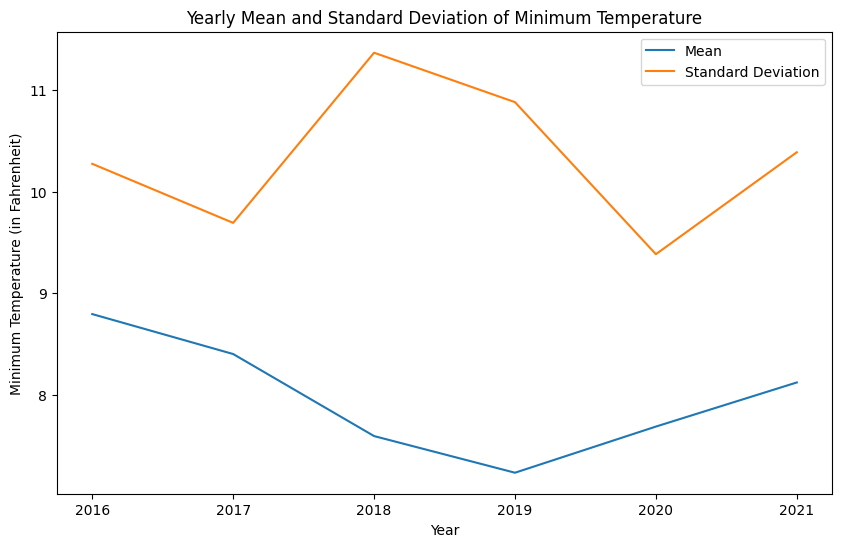

In [284]:
# visualizations

# Yearly Data Visualization
plt.figure(figsize=(10,6))
sns.lineplot(x='year',y='mean', data=yearly_stats, label='Mean')
sns.lineplot(x='year',y='std',data=yearly_stats, label='Standard Deviation')
plt.title('Yearly Mean and Standard Deviation of Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('Minimum Temperature (in Fahrenheit)')
plt.legend()
plt.show()

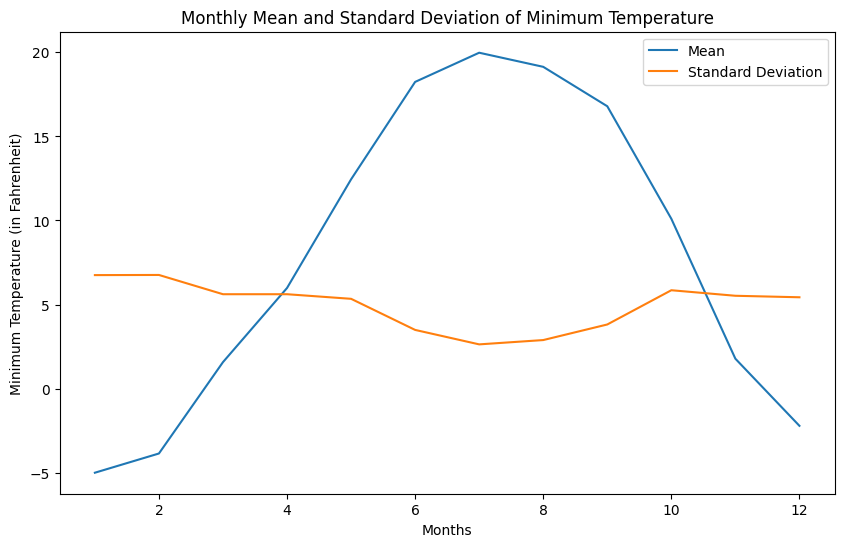

In [285]:
# Monthly Data Visualization
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='mean', data=monthly_stats, label='Mean')
sns.lineplot(x='month',y='std',data=monthly_stats, label='Standard Deviation')
plt.title('Monthly Mean and Standard Deviation of Minimum Temperature')
plt.xlabel('Months')
plt.ylabel('Minimum Temperature (in Fahrenheit)')
plt.legend()
plt.show()

The summary statistics and visualization of yearly data portrays yearly trends. The yearly trend in mean and standard deviation of minimum temperature can possibly show long-term climate change. On the other hand, the monthly trend in mean and standard deviation of minimum temperature can possibly demonstrate insights regarding seasons. It is useful to utilize statistics like mean and standard deviation as they provide information on both central tendencies (mean) and variability (standard deviation). Both mean and standard deviation are important in assessing the predictabilty of the cold weather in different months or years.

### Models

In [286]:
# process data for ML
# create X and y for train
X_train = weather_train[["year", "day_of_year"]]
y_train = weather_train["temperature_2m_min"]

# create X and y for validation-train
X_vtrain = weather_vtrain[["year", "day_of_year"]]
y_vtrain = weather_vtrain["temperature_2m_min"]

# create X and y for validation
X_validation = weather_validation[["year", "day_of_year"]]
y_validation = weather_validation["temperature_2m_min"]

# create X and y for test
X_test = weather_test[["year", "day_of_year"]]
y_test = weather_test["temperature_2m_min"]

In [287]:
# train models
# initialize model
knn = KNeighborsRegressor(n_neighbors=200)

# fit model to vtrain
knn.fit(X_vtrain, y_vtrain)

# make some predictions
pred_val = knn.predict(X_validation)

# calculate validation RMSE
root_mean_squared_error(y_validation, pred_val)

np.float64(4.5850713556339056)

This model above achieves a validation RMSE of 4.585.

In [288]:
# train models
knn = KNeighborsRegressor(n_neighbors=200)

# fit model to train
knn.fit(X_train, y_train)

# make some predictions
pred_test = knn.predict(X_test)

# calculate validation RMSE
root_mean_squared_error(y_test, pred_test)

np.float64(5.13962563374008)

## Results

In [289]:
# report model metrics
root_mean_squared_error(y_test, pred_test)

np.float64(5.13962563374008)

The model achieves a test RMSE of 5.139.

In [290]:
from joblib import dump
dump(knn, "urbana-weather.joblib")

['urbana-weather.joblib']

## Discussion

After conducting the RMSE on the model, it can be concluded that the model could somewhat be used in practice, but still limited. The model's test RMSE of 5.139 suggests that here is an average prediction of error of 5.139 Fahrenheit when forecasting the minimum temperature of Urbana, Illinois. This error suggests the model may not be fully reliable or accurate for making decisions about moving the market indoors. Because proividing swift and accurate predicion on weather is so crucial for vendors, this model would not likely be the most ideal model as the error of the model can bring about uncertain decisions. This can be detrimental by causing discomfort for both vendors and customers at the market.

Although the model may be considered not very reliable, the overall strategy of utilizing historical weather data to predict minimum temperature over the seasons in Urbana, Illinois seems appropriate. However, a potential flaw here is that the historical weather data on Open-Meteo was collected through the use of reanalysis. Reanalysis datasets are datasets that contains estimation of the values of various weather variables, which is useful in filling in gaps in historical records. In regions or areas with unrealiable and inconsistent observational data, reanalysis datasets rely on mathematical models to approximate or predict the weather. Especially in areas with less weather station, the rough estimation on historical weather records are made by combining observations from satelites, radar, and more. This could likely introduce bias by less precise and accurate weather data. 
The use of K-Nearest Neighbors on the weather data. It is important to think about whether temperture forecast should use the idea of distance between dates in time. The distance between two dates in time can not make much sense as weather patterns aren't always linear in time. In fact, weather patterns are often unpredictable. It is very likely that there may have been unusual and unexpected weather conditions or changes not fully recorded through the use of "distance" as a measure. As a result, the KNN model could forecast using dates that are near in time but far apart in terms of weather/temperature.

### Conclusion

Although Root Mean Squared Error (RMSE) provides a basic measure of accuracy of the model, RMSE alone can not provide a complete assessment on the model's accuracy and reliability in this specific case. The main problem with just using RMSE is that it lacks context. Without a certain threshold or range of temperature for the decision-making for outdoor or indoor market, it is obviously difficult to determine whether the RMSE is good or bad. Wrong or bad predictions made by the model could bring detrimental impacts to the business. The consequences following the errors of the model could be huge. A misprediction of the model may lead to vendor and customer dissatisfcation due to the freezing weather condition in the outdoors. Another possible consequence would be fewer number of customers showing up to the market, expecting the freezing cold outdoor conditions of the market. The RMSE provides a sense of how off or close the predictions are, but does not provide insight to where or when the error may be occuring. For example, the model may show great performance in warmer months but show poor performance on colder months. Getting a better understanding of the distribution of the errors throughout different seasonal weather or temperature ranges will help determine how truly reliable the model is.